# PREVISÃO DE CRESCIMENTO

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_squared_error

In [4]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)

In [5]:
covid = pd.read_csv('https://github.com/allanspadini/livro-val-allan/blob/main/covid_sp.csv?raw=True')
covid.head(3)

epidemiological_week        date  order_for_place state       city  \
0                202205  2022-01-31              707    SP  São Paulo   
1                202205  2022-01-30              706    SP  São Paulo   
2                202204  2022-01-29              705    SP  São Paulo   

   city_ibge_code place_type  last_available_confirmed  \
0         3550308       city                    976214   
1         3550308       city                    976214   
2         3550308       city                    976214   

   last_available_confirmed_per_100k_inhabitants  new_confirmed  \
0                                     7920.45131              0   
1                                     7920.45131              0   
2                                     7920.45131              0   

   last_available_deaths  new_deaths  last_available_death_rate  \
0                  39352           0                     0.0403   
1                  39352           0                     0.0403   
2                  39352           0                     0.0403   

   estimated_population  is_last  is_repeated  
0              12325232    False         True  
1              12325232    False         True  
2              12325232    False         True

In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   epidemiological_week                           707 non-null    int64  
 1   date                                           707 non-null    object 
 2   order_for_place                                707 non-null    int64  
 3   state                                          707 non-null    object 
 4   city                                           707 non-null    object 
 5   city_ibge_code                                 707 non-null    int64  
 6   place_type                                     707 non-null    object 
 7   last_available_confirmed                       707 non-null    int64  
 8   last_available_confirmed_per_100k_inhabitants  707 non-null    float64
 9   new_confirmed                                  707 non

In [7]:
covid['date'] = pd.to_datetime(covid['date'], format='%Y-%m-%d')
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   epidemiological_week                           707 non-null    int64         
 1   date                                           707 non-null    datetime64[ns]
 2   order_for_place                                707 non-null    int64         
 3   state                                          707 non-null    object        
 4   city                                           707 non-null    object        
 5   city_ibge_code                                 707 non-null    int64         
 6   place_type                                     707 non-null    object        
 7   last_available_confirmed                       707 non-null    int64         
 8   last_available_confirmed_per_100k_inhabitants  707 non-null 

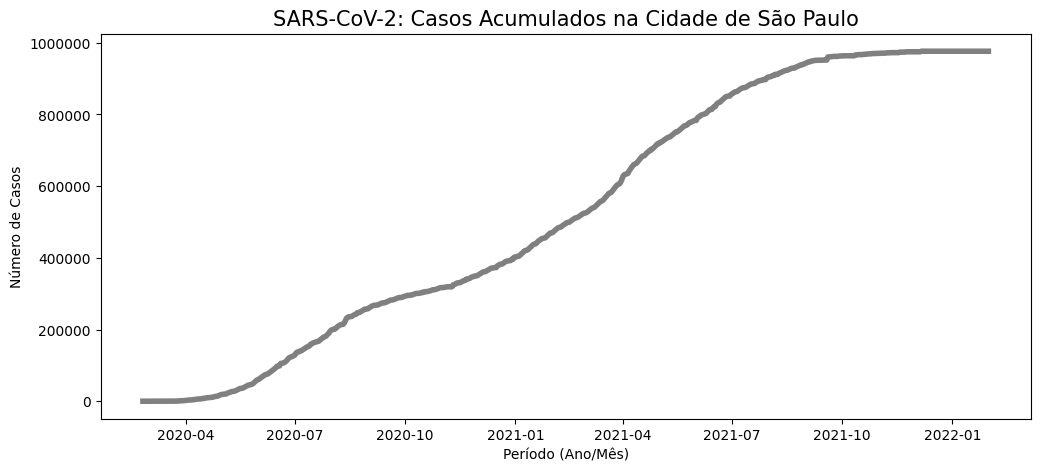

In [8]:
fig, ax = plt.subplots(figsize = (12, 5))
sns.lineplot(x='date', y='last_available_confirmed', data=covid, linewidth = 4, color='grey')
plt.title('SARS-CoV-2: Casos Acumulados na Cidade de São Paulo', fontsize = 15)
plt.ylabel('Número de Casos', fontsize= 10)
plt.xlabel('Período (Ano/Mês)', fontsize= 10)
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

In [9]:
df_covid = pd.DataFrame()

df_covid['ds'] = covid['date']
df_covid['y'] = covid['last_available_confirmed']

df_covid.head()

ds       y
0 2022-01-31  976214
1 2022-01-30  976214
2 2022-01-29  976214
3 2022-01-28  976214
4 2022-01-27  976214

In [10]:
# Capacidade de Carga
df_covid['cap'] = 1000000

df_covid.head()

ds       y      cap
0 2022-01-31  976214  1000000
1 2022-01-30  976214  1000000
2 2022-01-29  976214  1000000
3 2022-01-28  976214  1000000
4 2022-01-27  976214  1000000

In [11]:
modelo = Prophet(growth='logistic')                         # Initialize the Prophet model with logistic growth
modelo.fit(df_covid)                                        # Fit the model using the COVID-19 dataset

dataFramefuturo = modelo.make_future_dataframe(periods=30)  # Create a future dataframe for predictions (next 30 days)
dataFramefuturo['cap'] = 1000000                            # Set an upper limit (capacity) for logistic growth at 1,000,000 cases

previsao = modelo.predict(dataFramefuturo)                  # Generate predictions using the fitted model

10:44:06 - cmdstanpy - INFO - Chain [1] start processing
10:44:07 - cmdstanpy - INFO - Chain [1] done processing


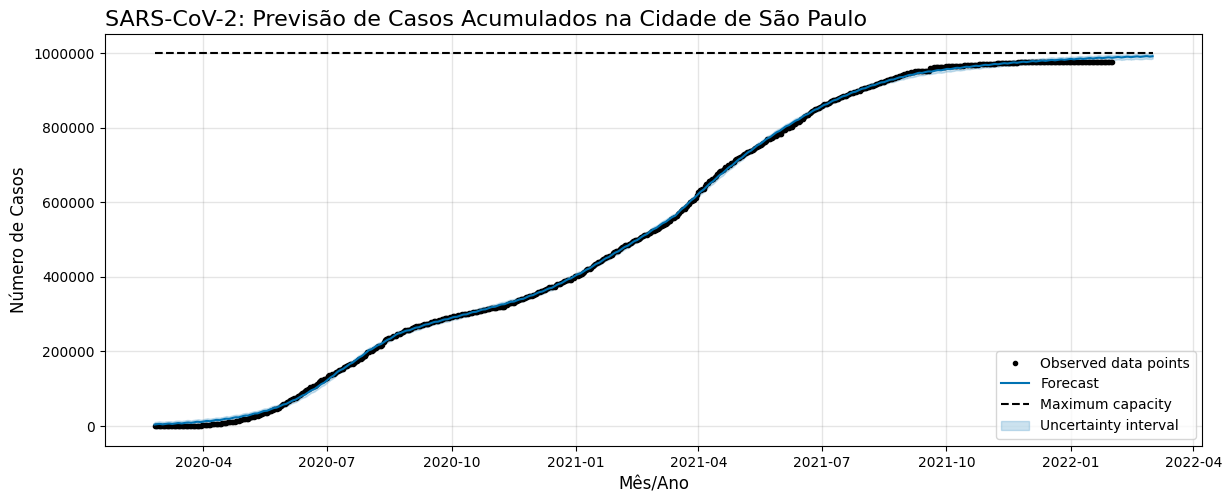

In [12]:
modelo.plot(previsao, figsize=(12,5));
plt.title('SARS-CoV-2: Previsão de Casos Acumulados na Cidade de São Paulo', loc = 'left', fontsize = 16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

## Change Points

In [14]:
url = 'https://github.com/allanspadini/livro-val-allan/raw/main/GlobalLandTemperaturesByCountry.csv'
dados = pd.read_csv(url)
dados.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

In [15]:
dados.columns = ['Data', 'Temperatura', 'Incerteza', 'País']

dados_br = dados.query('País == "Brazil"')
dados_br = dados_br.dropna()

df = pd.DataFrame()
df['ds'] = dados_br['Data']
df['y'] = dados_br['Temperatura']
df.head()

ds       y
77110  1832-01-01  24.935
77111  1832-02-01  24.505
77112  1832-03-01  24.617
77113  1832-04-01  23.990
77114  1832-05-01  23.124

In [16]:
# Criar  uma  instância  da classe  do  modelo
modelo = Prophet()

# Fazer o ajuste do modelo com os dados
modelo.fit(df)

# Create a future dataframe for forecasting
dataFramefuturo = modelo.make_future_dataframe(periods=120,   # periods=120: Forecasts for the next 120 months (10 years)
                                               freq='ME')     # freq='M': Monthly frequency 
# Make predictions using the trained model
previsao = modelo.predict(dataFramefuturo)  

10:44:13 - cmdstanpy - INFO - Chain [1] start processing
10:44:13 - cmdstanpy - INFO - Chain [1] done processing


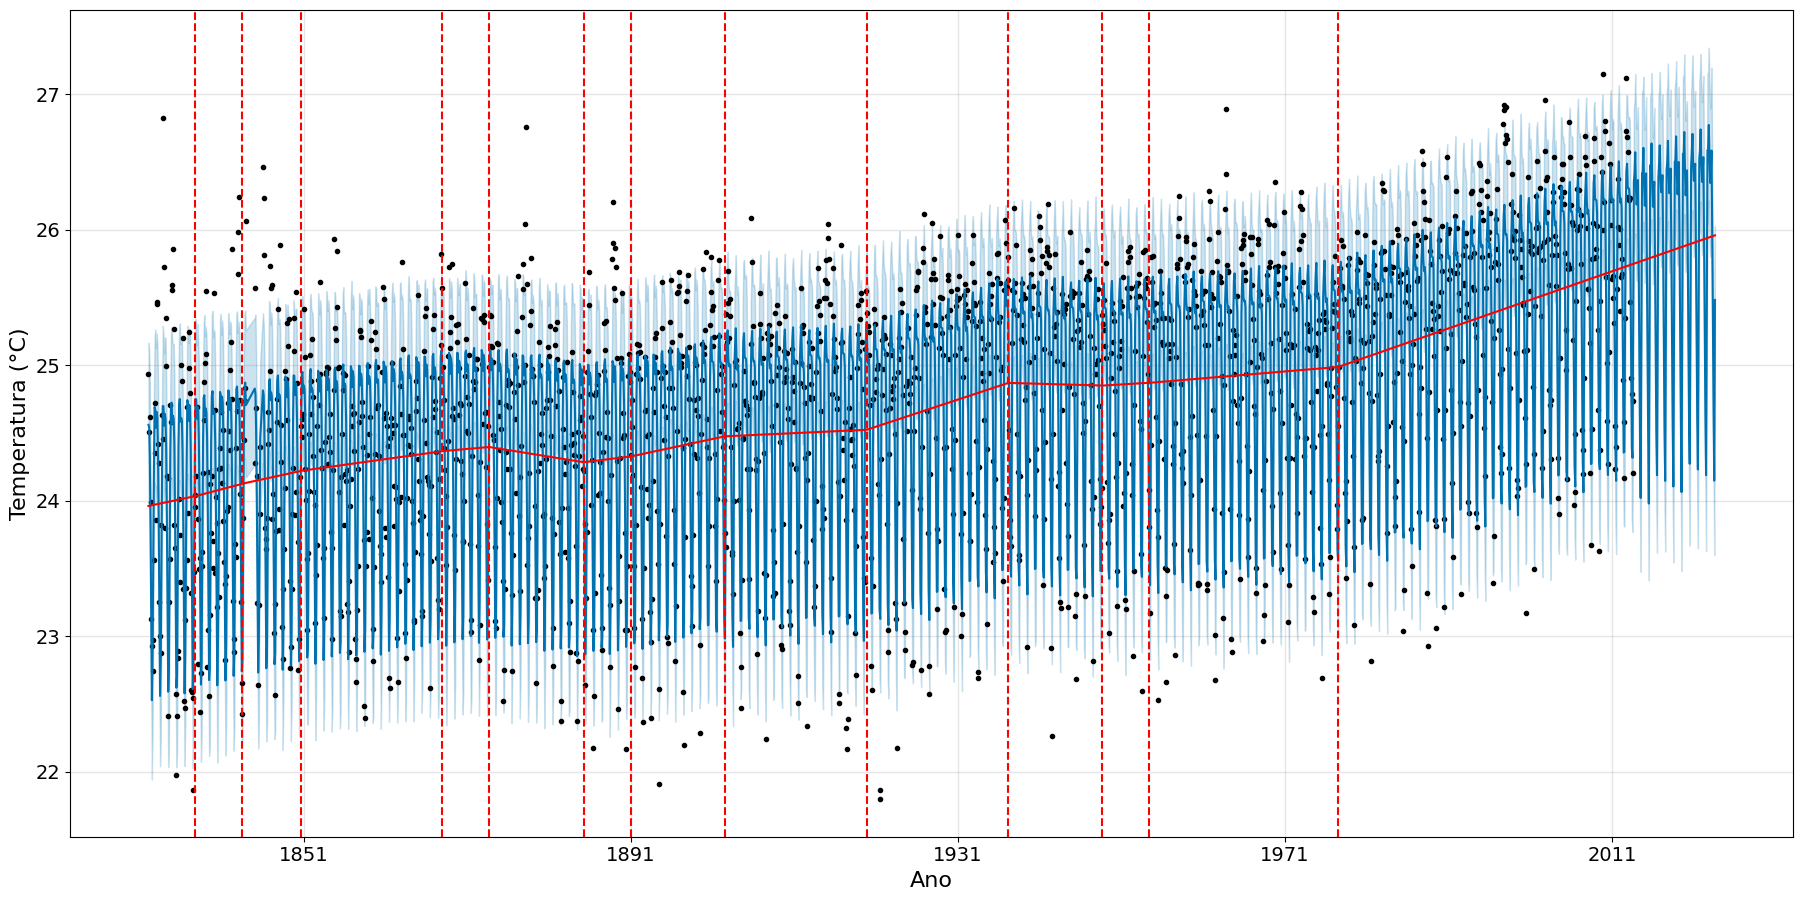

In [17]:
fig = modelo.plot(previsao, figsize=(18,9));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Temperatura (°C)', fontsize=16)
plt.show()

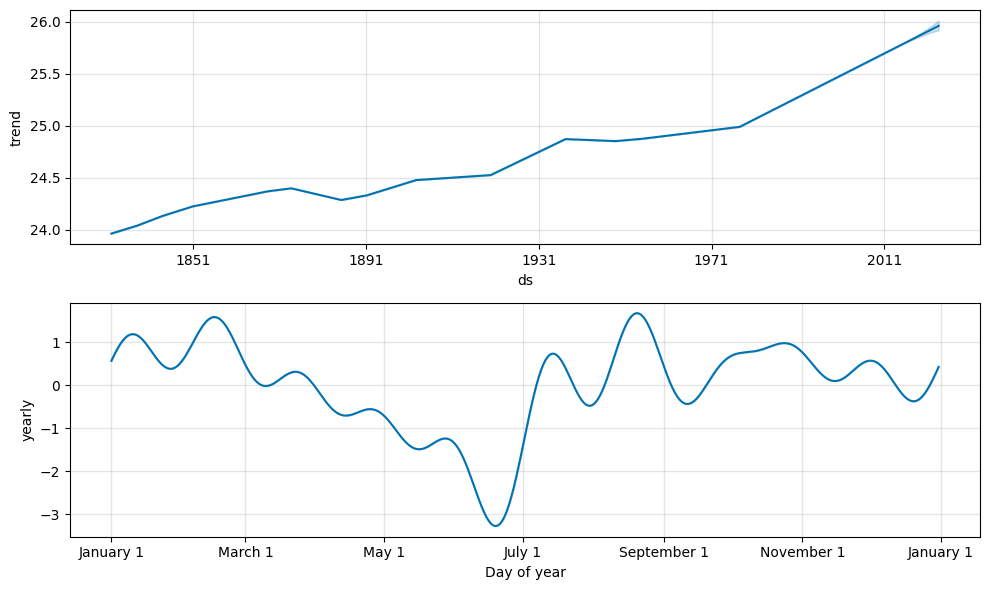

In [18]:
modelo.plot_components(previsao, figsize=(10,6));

### Alterando o número de Changepoints

In [20]:
# Create an empty DataFrame for training data
df_treino = pd.DataFrame()  

# Assign the first 2000 rows to the training dataset
df_treino['ds'] = dados_br['Data'][:2000]        
df_treino['y'] = dados_br['Temperatura'][:2000]  


# Create an empty DataFrame for testing data
df_teste = pd.DataFrame()  

# Assign the remaining rows to the test dataset
df_teste['ds'] = dados_br['Data'][2000:]        
df_teste['y'] = dados_br['Temperatura'][2000:] 

In [21]:
 # Limits the number of trend changepoints to 5
modelo = Prophet(n_changepoints=5) #<====                                  

# Trains the Prophet model with historical data
modelo.fit(df_treino)                                                  

# Use the trained model to make predictions
dataFramefuturo = modelo.make_future_dataframe(periods=150, freq='M')  

# Use the trained model to make predictions
previsao = modelo.predict(dataFramefuturo)                             

10:44:14 - cmdstanpy - INFO - Chain [1] start processing
10:44:14 - cmdstanpy - INFO - Chain [1] done processing


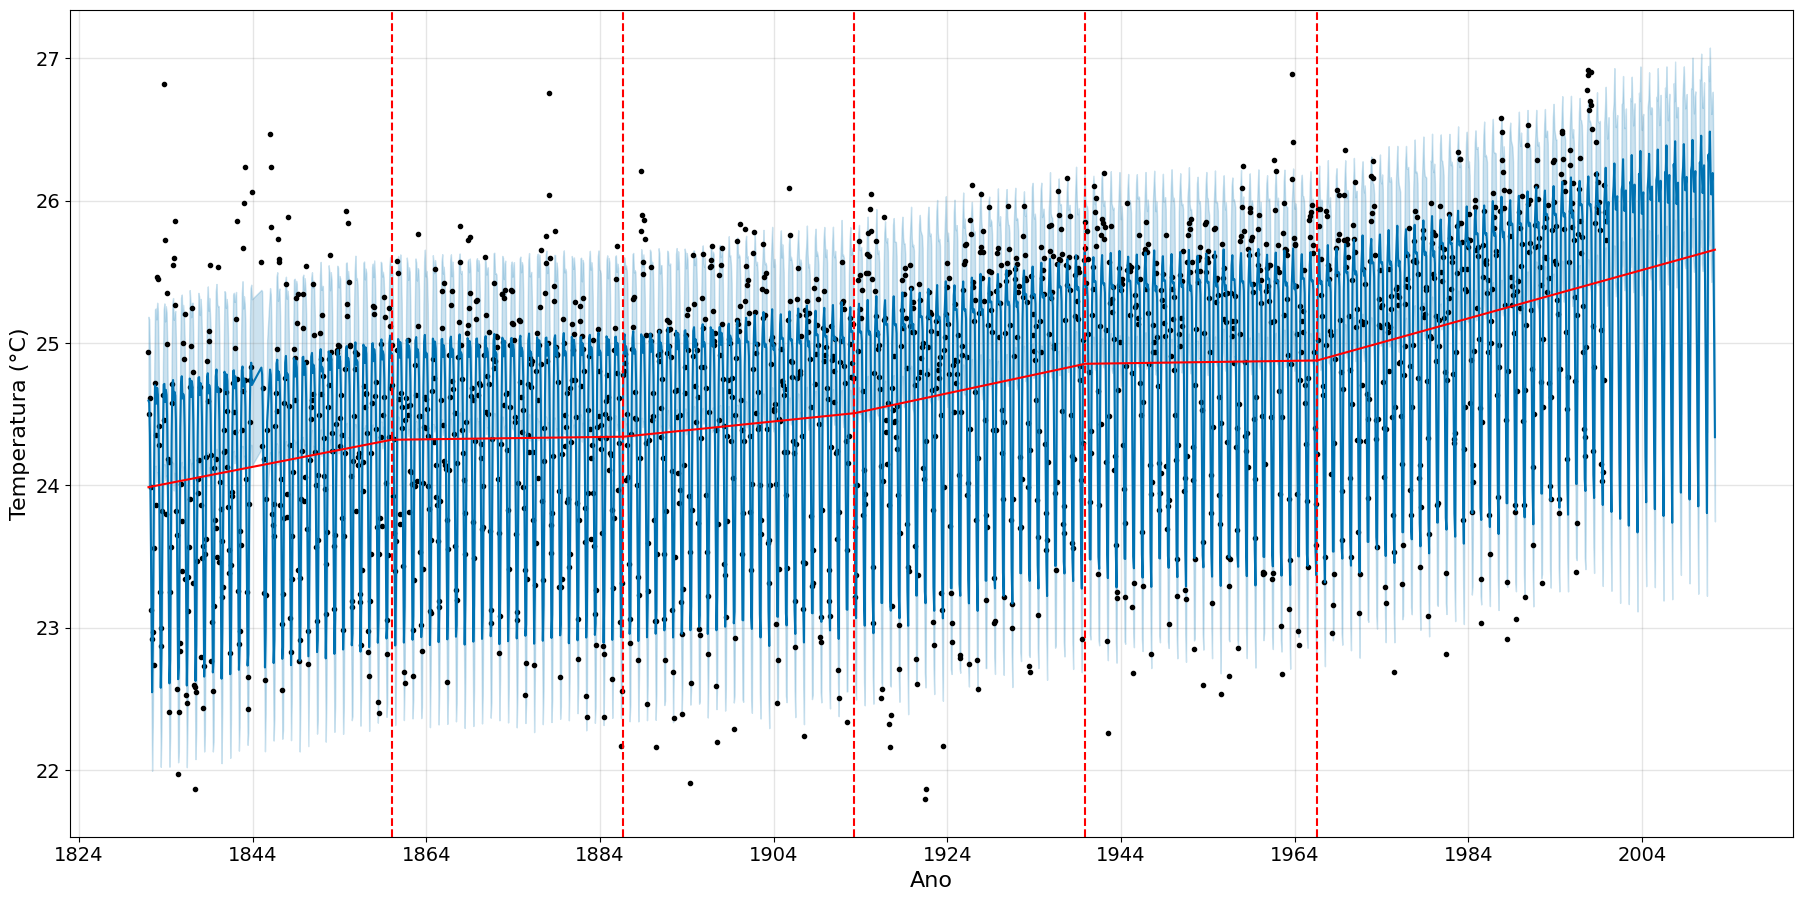

In [22]:
fig = modelo.plot(previsao, figsize=(18,9));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Temperatura (°C)', fontsize=16)
plt.show()

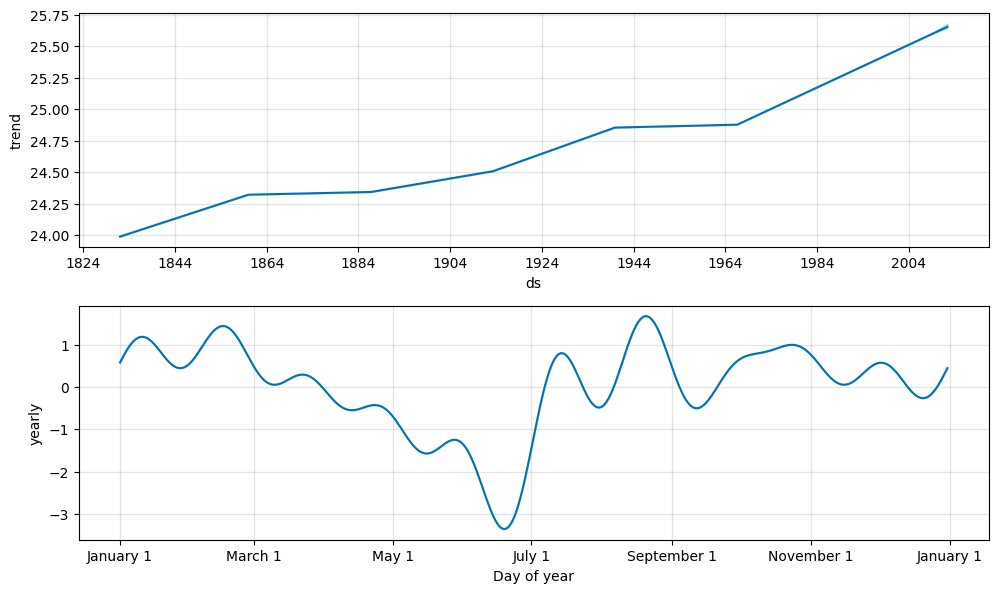

In [23]:
modelo.plot_components(previsao, figsize=(10,6));

### changepoint_range

Além de adicionar os  changepoints  nós também podemos
alterar onde eles são adicionados. Para fazer isso, podemos usar o
argumento  changepoint_range .  O  padrão  desse  argumento  é
0.80.  Isso  significa  que  o  modelo  não  se  ajustará  a  nenhuma
mudança  de  tendência  nos  últimos  20%  da  série  temporal  para
manter  a  tendência  geral  da  série.  Isso  é  algo  conservador,  para
evitar o overfitting do modelo. Vamos alterar esse parâmetro para
0.90 para observar a mudança:

In [26]:
modelo = Prophet(n_changepoints=5, changepoint_range=0.90) #<====
modelo.fit(df_treino)
dataFramefuturo = modelo.make_future_dataframe(periods=150, freq = 'ME')
previsao = modelo.predict(dataFramefuturo)

10:44:17 - cmdstanpy - INFO - Chain [1] start processing
10:44:17 - cmdstanpy - INFO - Chain [1] done processing


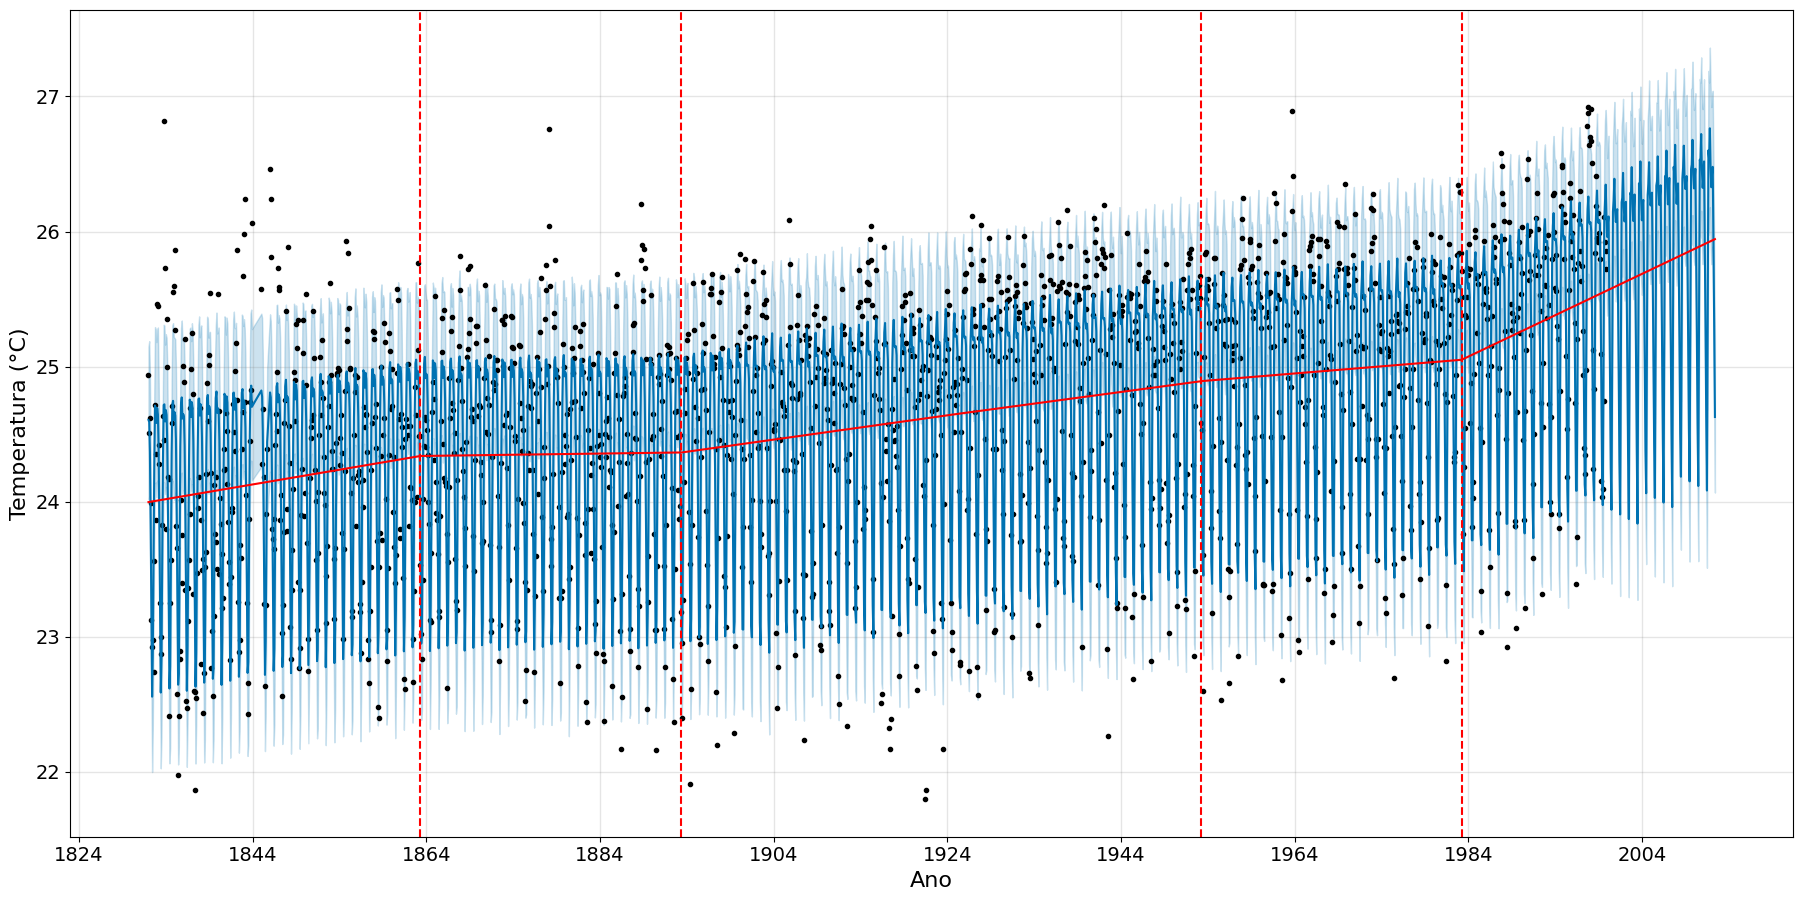

In [27]:
fig = modelo.plot(previsao, figsize=(18,9));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Temperatura (°C)', fontsize=16)
plt.show()

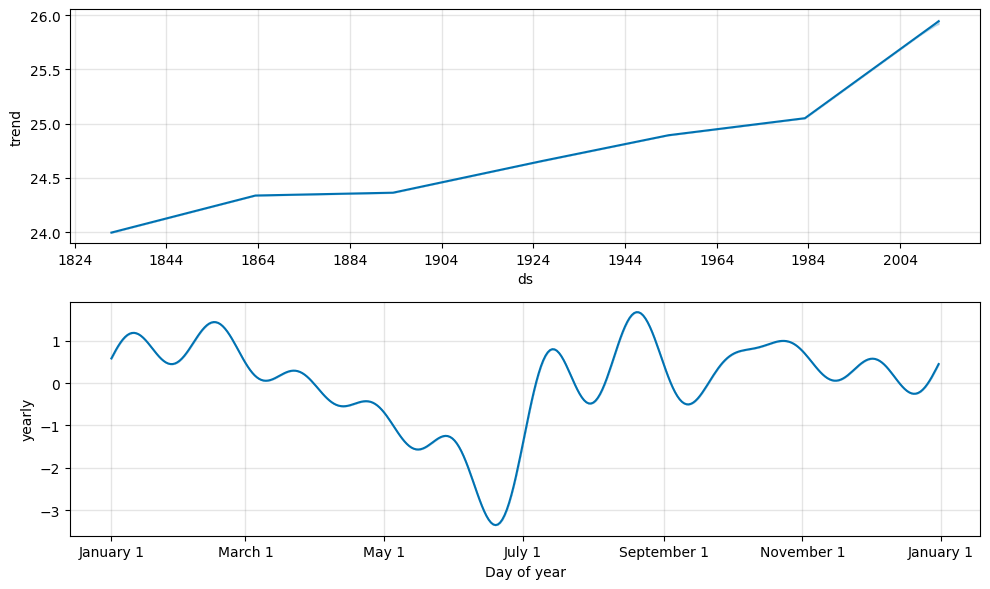

In [28]:
modelo.plot_components(previsao, figsize=(10,6));

### changepoint_prior_scale

Se  as  mudanças  de  tendência  estão  sendo superajustadas (flexibilidade demais) ou subajustadas (flexibilidade insuficiente), você pode ajustar o argumento de entrada `changepoint_prior_scale`. Por padrão, esse parâmetro é definido como 0.05. Aumentá-lo tornará a tendência mais flexível.

Vamos aumentar a flexibilidade para 10 para que seja possível notar a diferença. Os outros parâmetros serão mantidos como default:

In [30]:
modelo = Prophet(changepoint_prior_scale=10) #<====
modelo.fit(df_treino)
dataFramefuturo = modelo.make_future_dataframe(periods=150, freq = 'ME')
previsao = modelo.predict(dataFramefuturo)

10:44:19 - cmdstanpy - INFO - Chain [1] start processing
10:44:20 - cmdstanpy - INFO - Chain [1] done processing


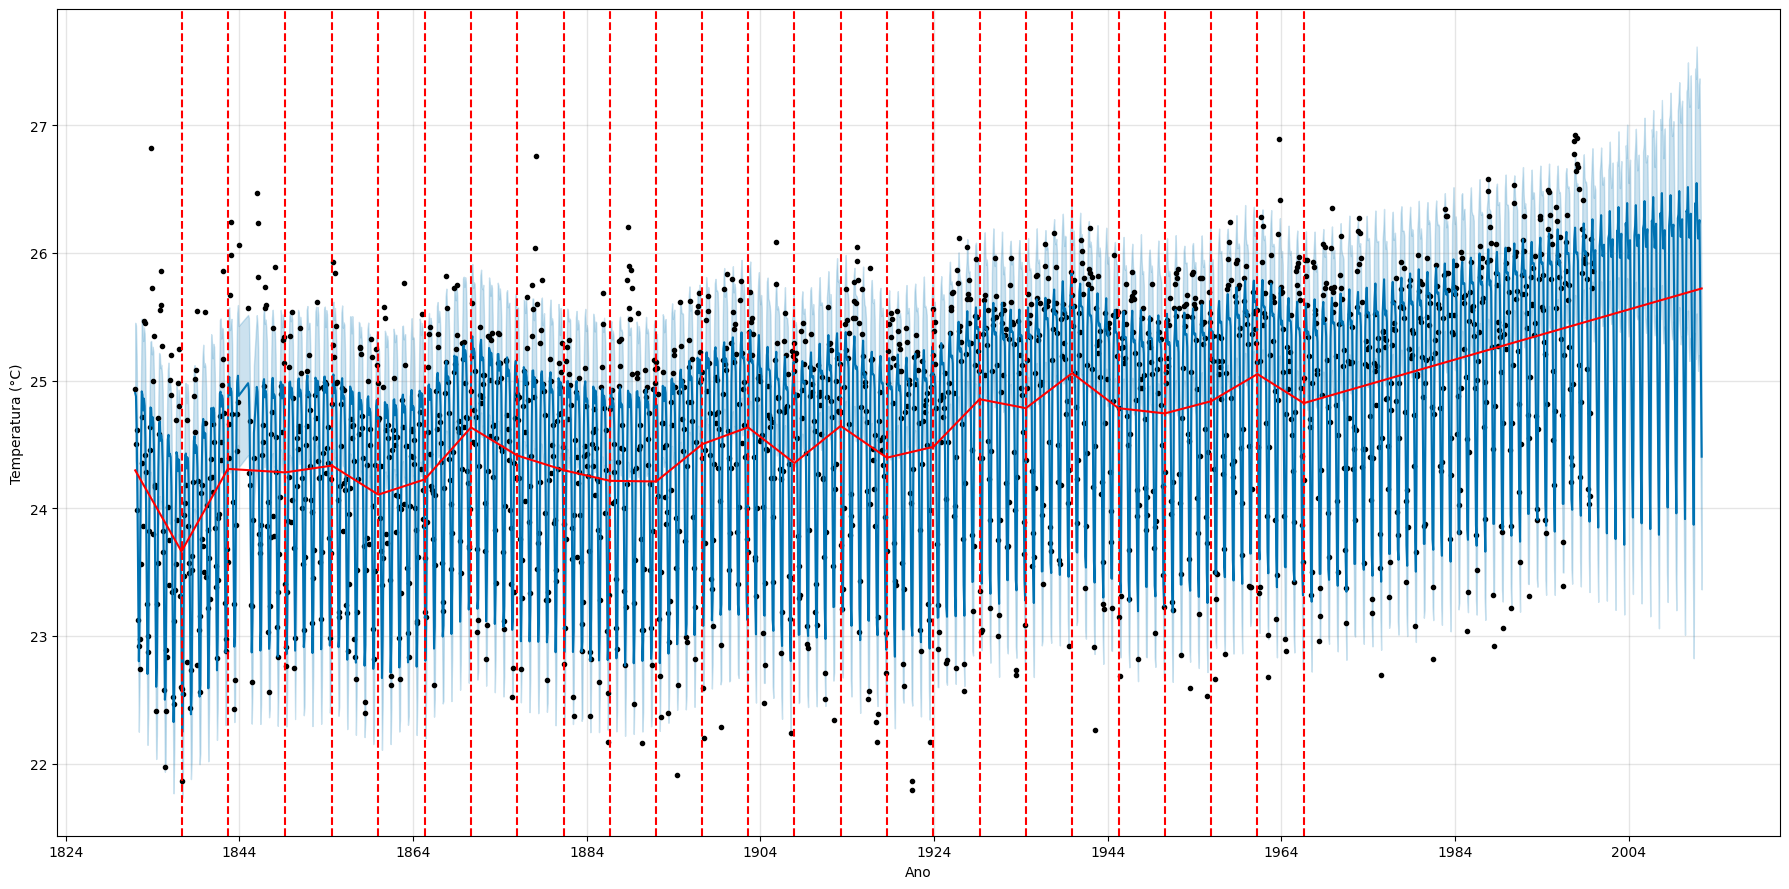

In [31]:
fig = modelo.plot(previsao, figsize=(18,9));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.show()

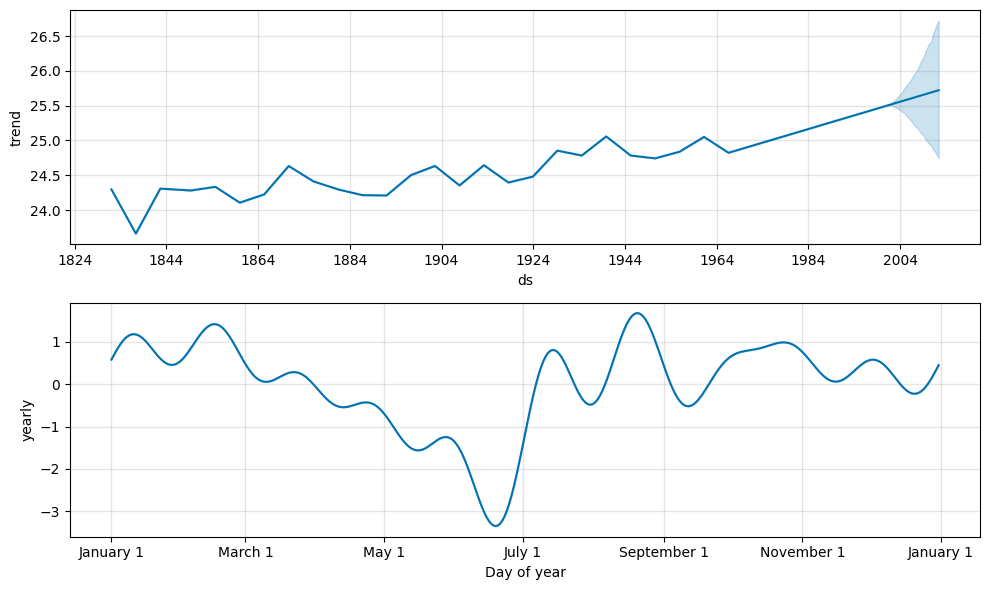

In [32]:
modelo.plot_components(previsao, figsize=(10,6));

A flexibilidade está bem alta e temos diversos momentos em que a tendência está tentando se adaptar aos pontos de mudança.Uma coisa importante quando alteramos parâmetros como esse é que  o  intervalo de  confiança  em  torno  dos  valores  previstos  fica muito elevado. Observe a faixa em cinza no final da tendência: ela está  muito  mais  ampla  comparada  aos  exemplos  anteriores. É importante destacar, também, que quando aumentamos demais a flexibilidade podemos gerar overfitting.

### Datas específicas

Também podemos especificar a data dos changepoints. Se você souber uma data em que algo influenciou e gerou uma mudança, esta data pode ser adicionada ao modelo, no argumento changepoints :

In [35]:
modelo = Prophet(changepoints=['1980-01-01']) #<====
modelo.fit(df_treino)
dataFramefuturo = modelo.make_future_dataframe(periods=150, freq = 'ME')
previsao = modelo.predict(dataFramefuturo)

10:44:22 - cmdstanpy - INFO - Chain [1] start processing
10:44:22 - cmdstanpy - INFO - Chain [1] done processing


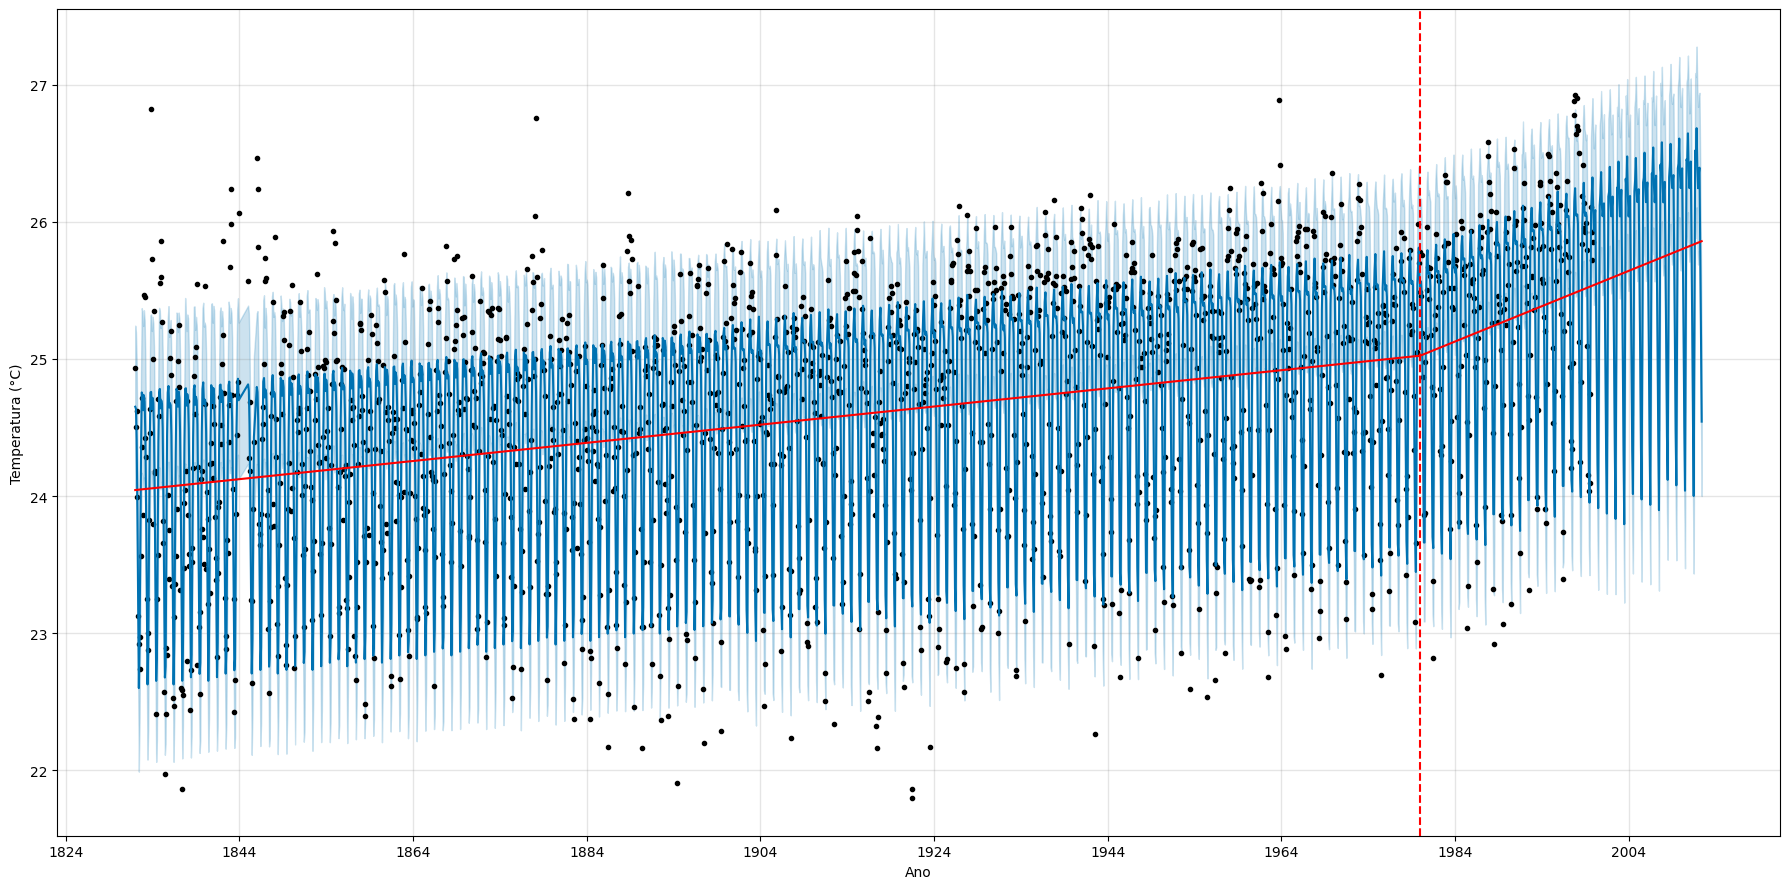

In [36]:
fig = modelo.plot(previsao, figsize=(18,9));
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)
plt.xlabel('Ano')
plt.ylabel('Temperatura (°C)')
plt.show()

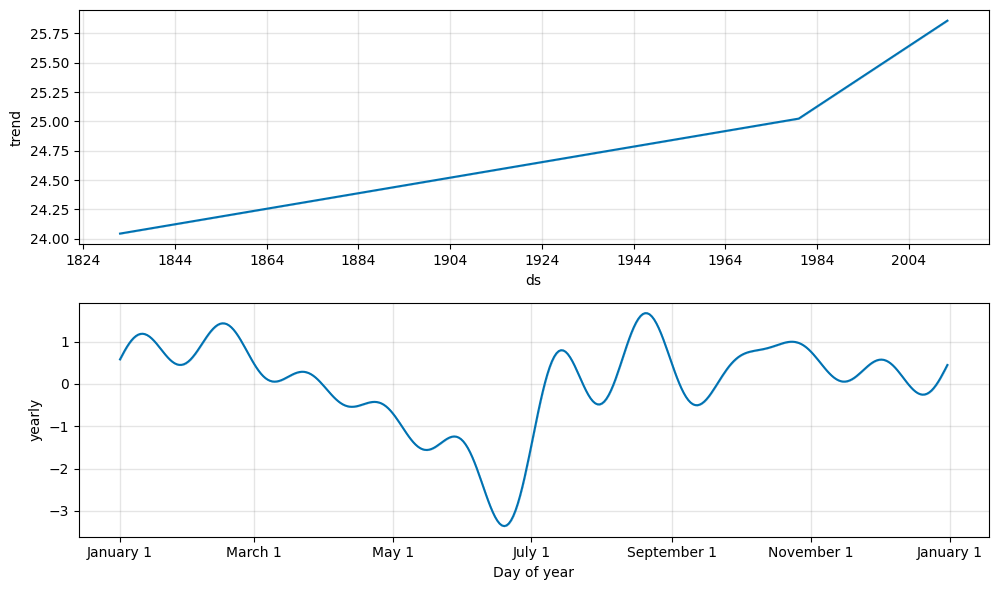

In [37]:
modelo.plot_components(previsao, figsize=(10,6));

# Sazonalidade

In [39]:
modelo = Prophet(seasonality_mode='additive')
modelo.fit(df_treino)
dataFramefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataFramefuturo)

10:44:25 - cmdstanpy - INFO - Chain [1] start processing
10:44:25 - cmdstanpy - INFO - Chain [1] done processing


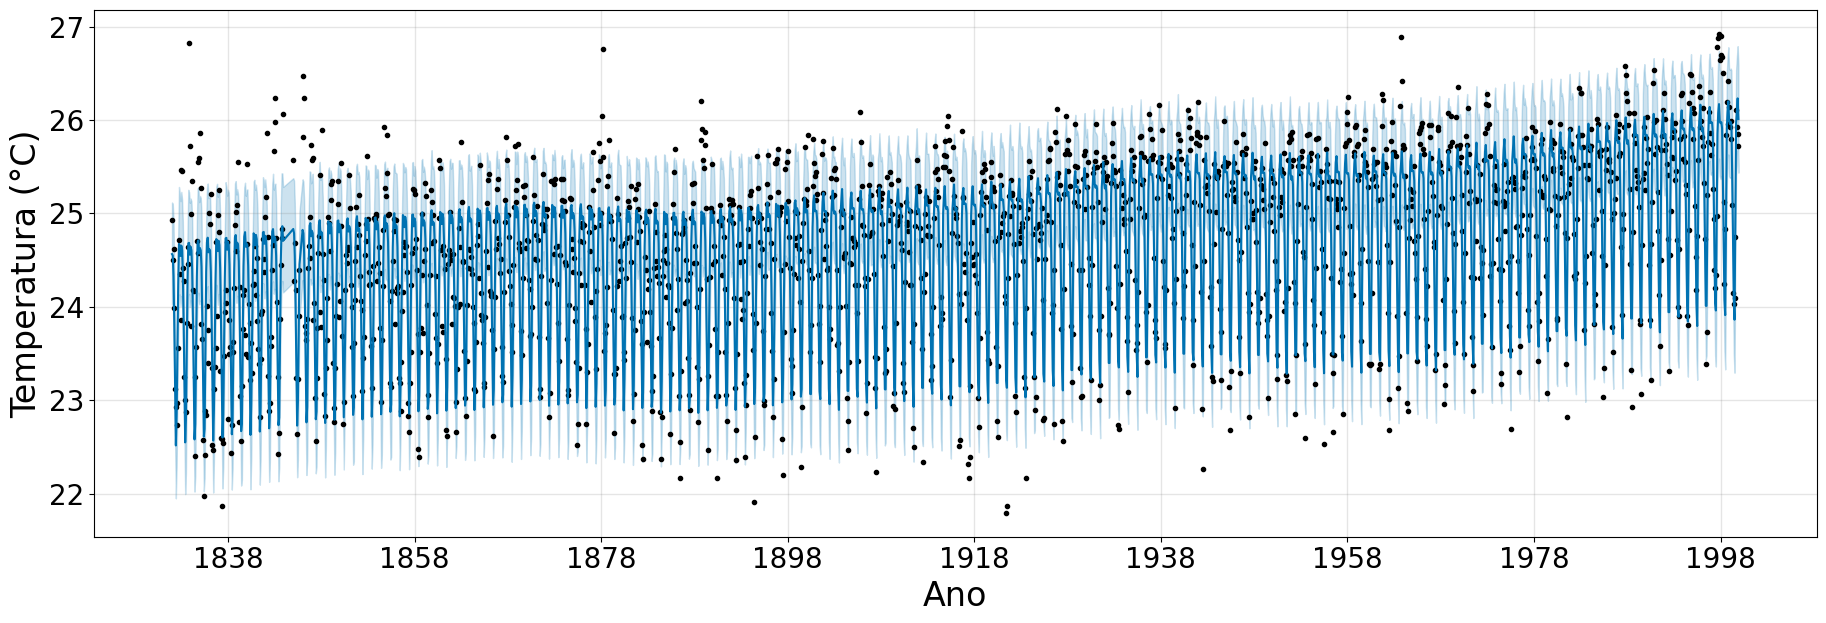

In [40]:
modelo.plot(previsao, figsize=(18,6));
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

In [41]:
mean_squared_error(y_true = df_treino['y'], y_pred=previsao['yhat'][:2000])

0.19746946036102392

In [42]:
modelo = Prophet(seasonality_mode='multiplicative')
modelo.fit(df_treino)
dataFramefuturo = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(dataFramefuturo)

10:44:26 - cmdstanpy - INFO - Chain [1] start processing
10:44:27 - cmdstanpy - INFO - Chain [1] done processing


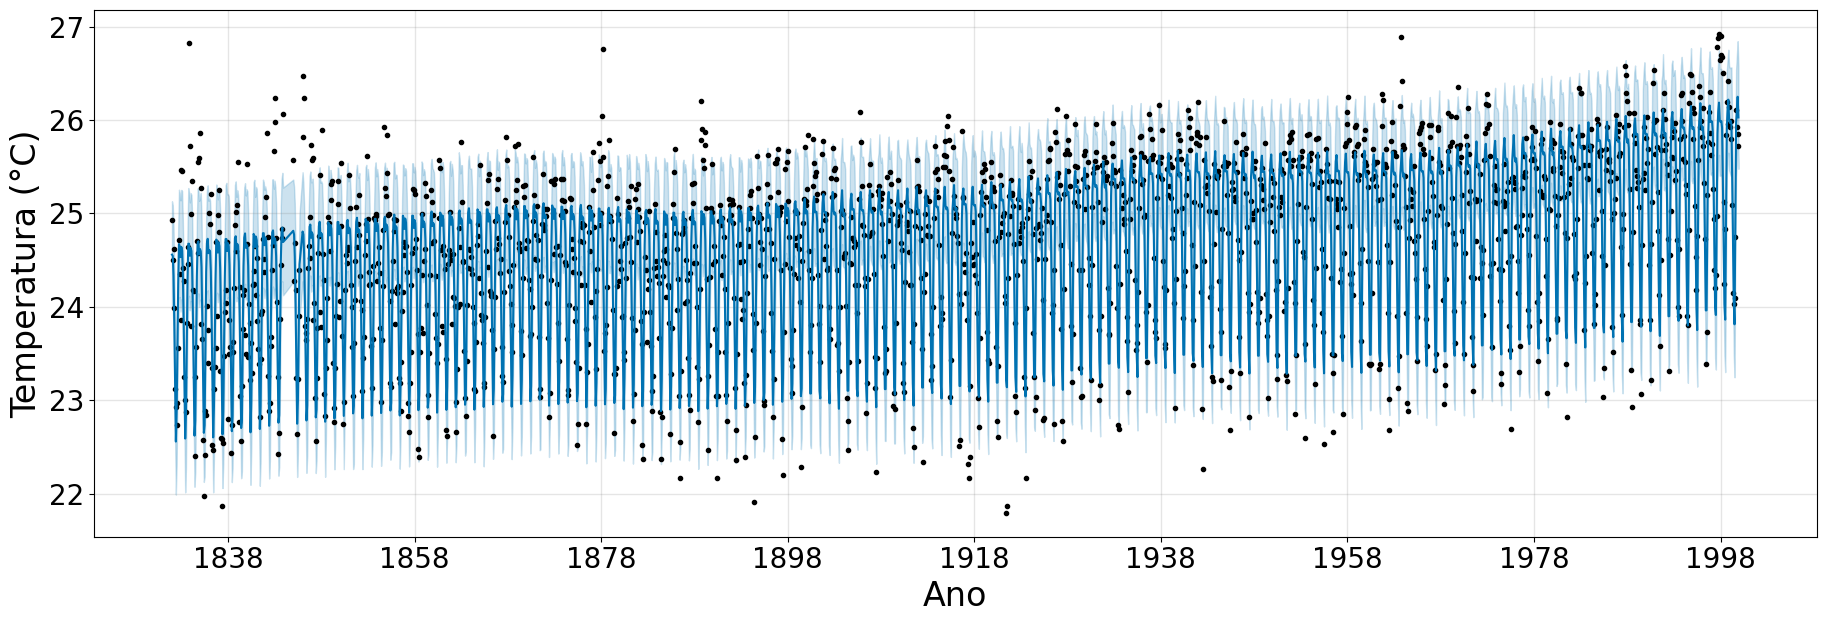

In [43]:
modelo.plot(previsao, figsize=(18,6));
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.show()

In [44]:
mean_squared_error(y_true = df_treino['y'], y_pred=previsao['yhat'][:2000])

0.1975373407169527

Bom, o valor também é muito próximo. Para esses dados, especificamente, nós não conseguimos notar a diferença entre as sazonalidades.

### SAZONALIDADE ADITIVA X SAZONALIDADE MULTIPLICATIVA

In [47]:
df = pd.read_csv('https://github.com/rrajmp9/Australia-drug-sales-prediction/blob/master/AusAntidiabeticDrug.csv?raw=true')
df.head()

ds         y
0  1991-07-01  3.526591
1  1991-08-01  3.180891
2  1991-09-01  3.252221
3  1991-10-01  3.611003
4  1991-11-01  3.565869

In [48]:
df.tail()

ds          y
199  2008-02-01  21.654285
200  2008-03-01  18.264945
201  2008-04-01  23.107677
202  2008-05-01  22.912510
203  2008-06-01  19.431740

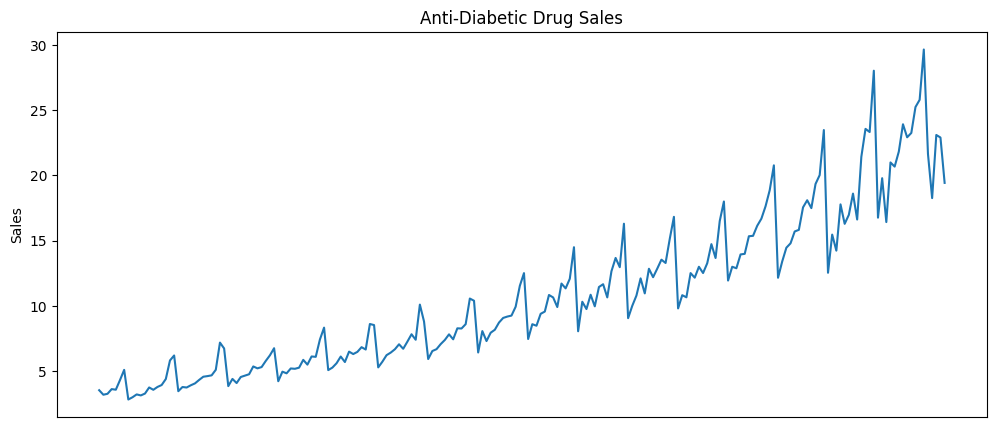

In [49]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(df['ds'],df['y'])
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
ax.set_title('Anti-Diabetic Drug Sales')
ax.set_xticks([])            # Remove tick labels on the y-axis
ax.xaxis.set_visible(False)  # Hide the entire y-axis, including ticks and labels
plt.show();

In [50]:
# Create and fit a Prophet model with additive seasonality
modelo = Prophet(seasonality_mode='additive')  # Define the model with additive seasonality
modelo.fit(df)                                 # Fit the model to the data

# Generate a future dataframe for forecasting
dataFramefuturo = modelo.make_future_dataframe(periods=36, freq='M')  # Create future dates for 36 months

# Generate forecasts
previsao = modelo.predict(dataFramefuturo)  

10:44:29 - cmdstanpy - INFO - Chain [1] start processing
10:44:29 - cmdstanpy - INFO - Chain [1] done processing


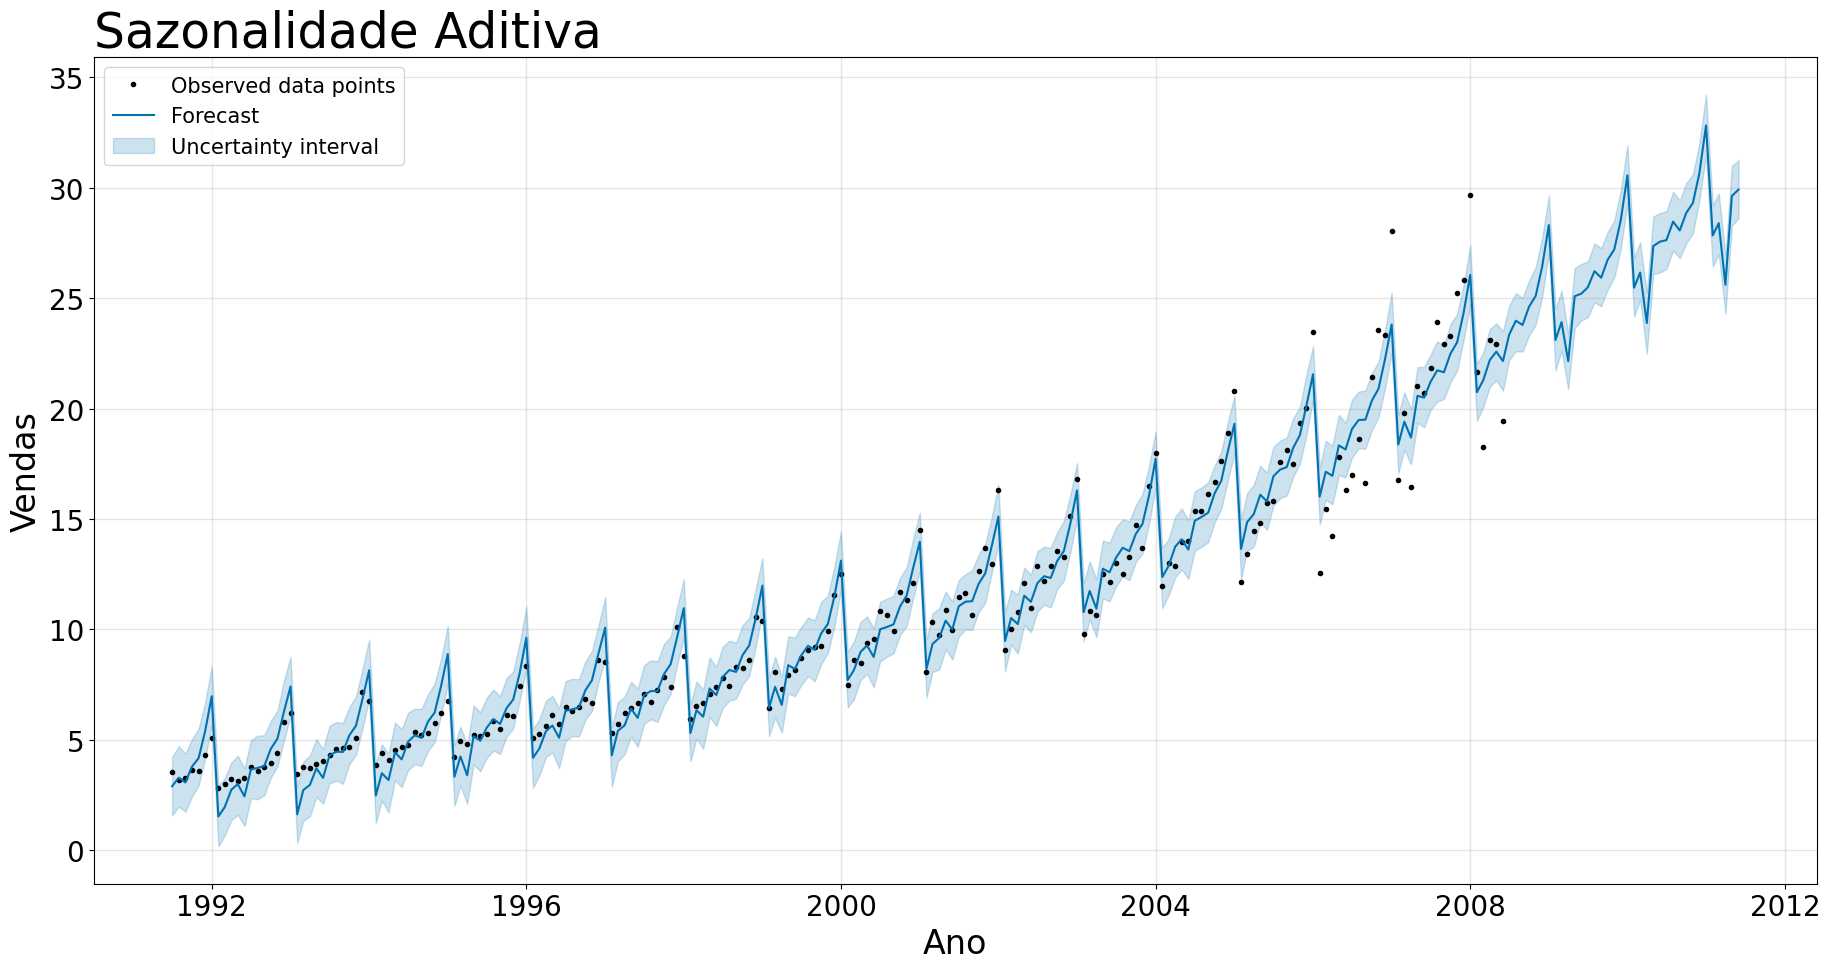

In [51]:
modelo.plot(previsao, figsize=(18,9));
plt.title('Sazonalidade Aditiva ', loc = 'left', fontsize = 35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Vendas', fontsize=24)
plt.legend(fontsize=15)
plt.show()

In [52]:
# Compute the mean squared error (MSE) between actual values (y_true) and predicted values (y_pred) for the first 204 observations
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'][:204])  

1.0526228867178198

In [53]:
#multiplicativa
modelo = Prophet(seasonality_mode='multiplicative') 
modelo.fit(df)
dataFramefutur = modelo.make_future_dataframe(periods=36, freq='M')
previsao = modelo.predict(dataFramefuturo)

10:44:30 - cmdstanpy - INFO - Chain [1] start processing
10:44:30 - cmdstanpy - INFO - Chain [1] done processing


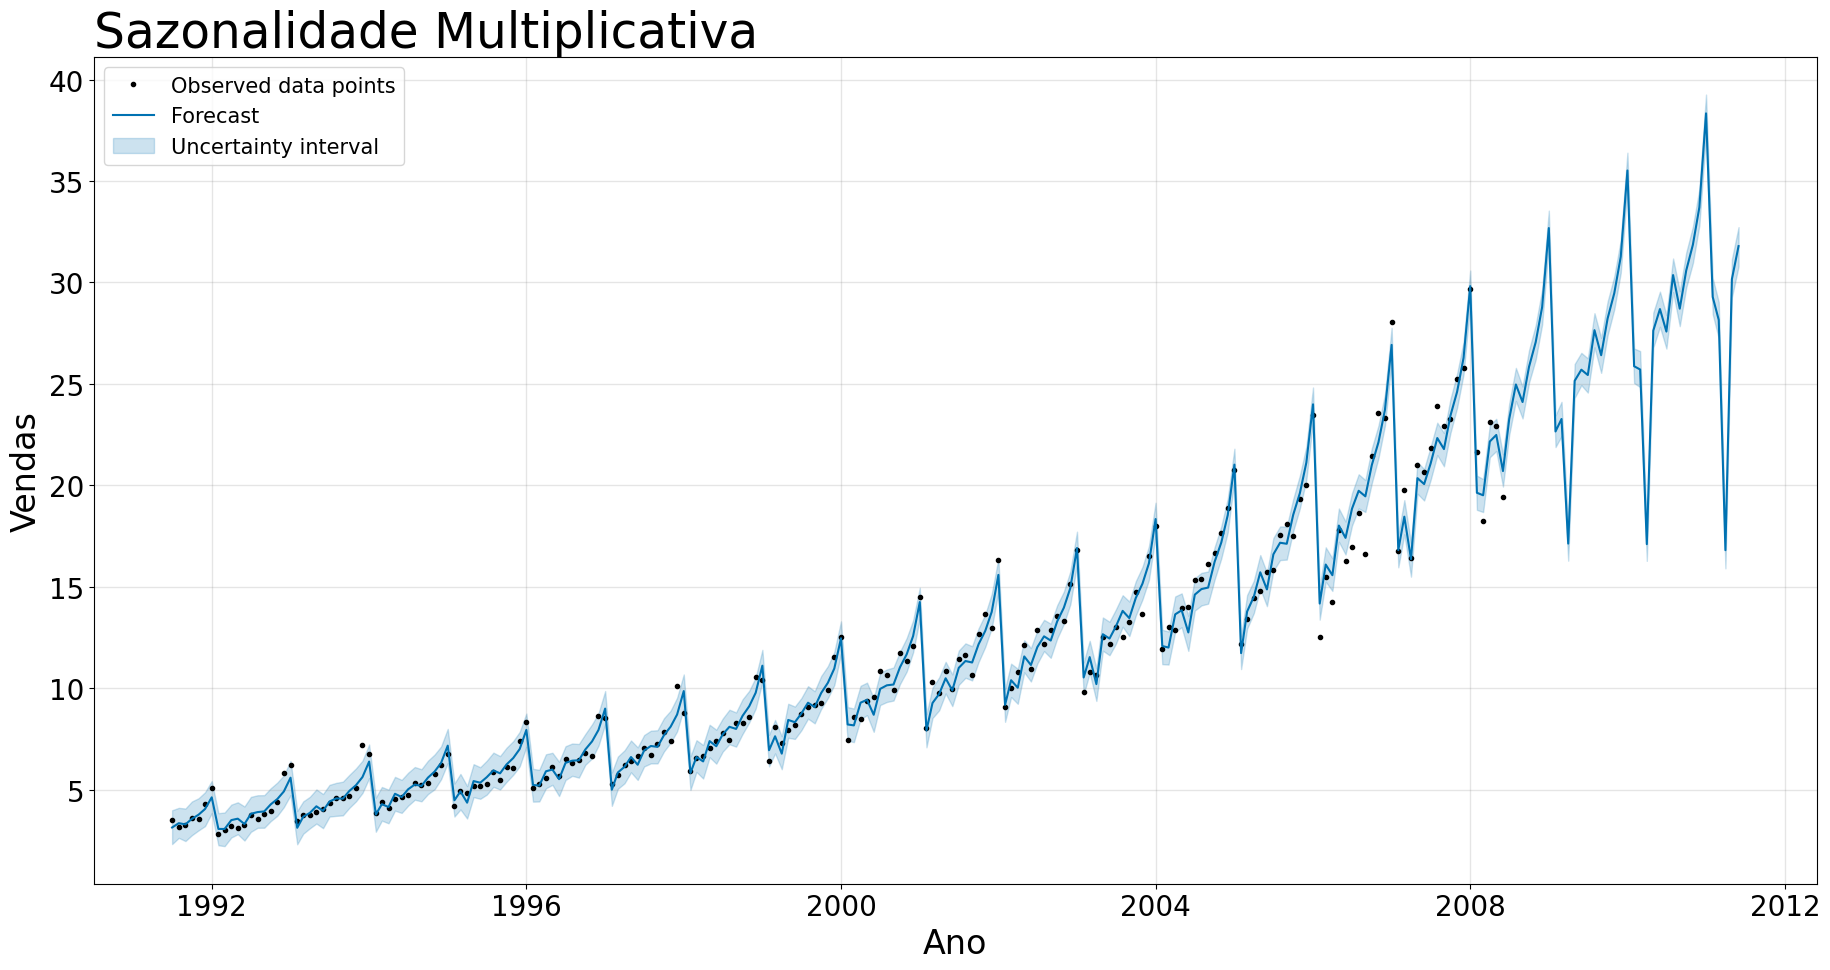

In [54]:
modelo.plot(previsao, figsize=(18,9));
plt.title('Sazonalidade Multiplicativa ', loc = 'left', fontsize = 35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Vendas', fontsize=24)
plt.legend(fontsize=15)
plt.show()

In [55]:
# Compute the mean squared error (MSE) between actual values (y_true) and predicted values (y_pred) for the first 204 observations
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'][:204]) 

0.4099330354110987

### AJUSTANDO A FLEXIBILIDADE DA SAZONALIDADE

In [57]:
modelo = Prophet(seasonality_mode='multiplicative', seasonality_prior_scale=0.01) 
modelo.fit(df)
dataFramefuturo = modelo.make_future_dataframe(periods=36, freq='M')
previsao = modelo.predict(dataFramefuturo)

10:44:30 - cmdstanpy - INFO - Chain [1] start processing
10:44:30 - cmdstanpy - INFO - Chain [1] done processing


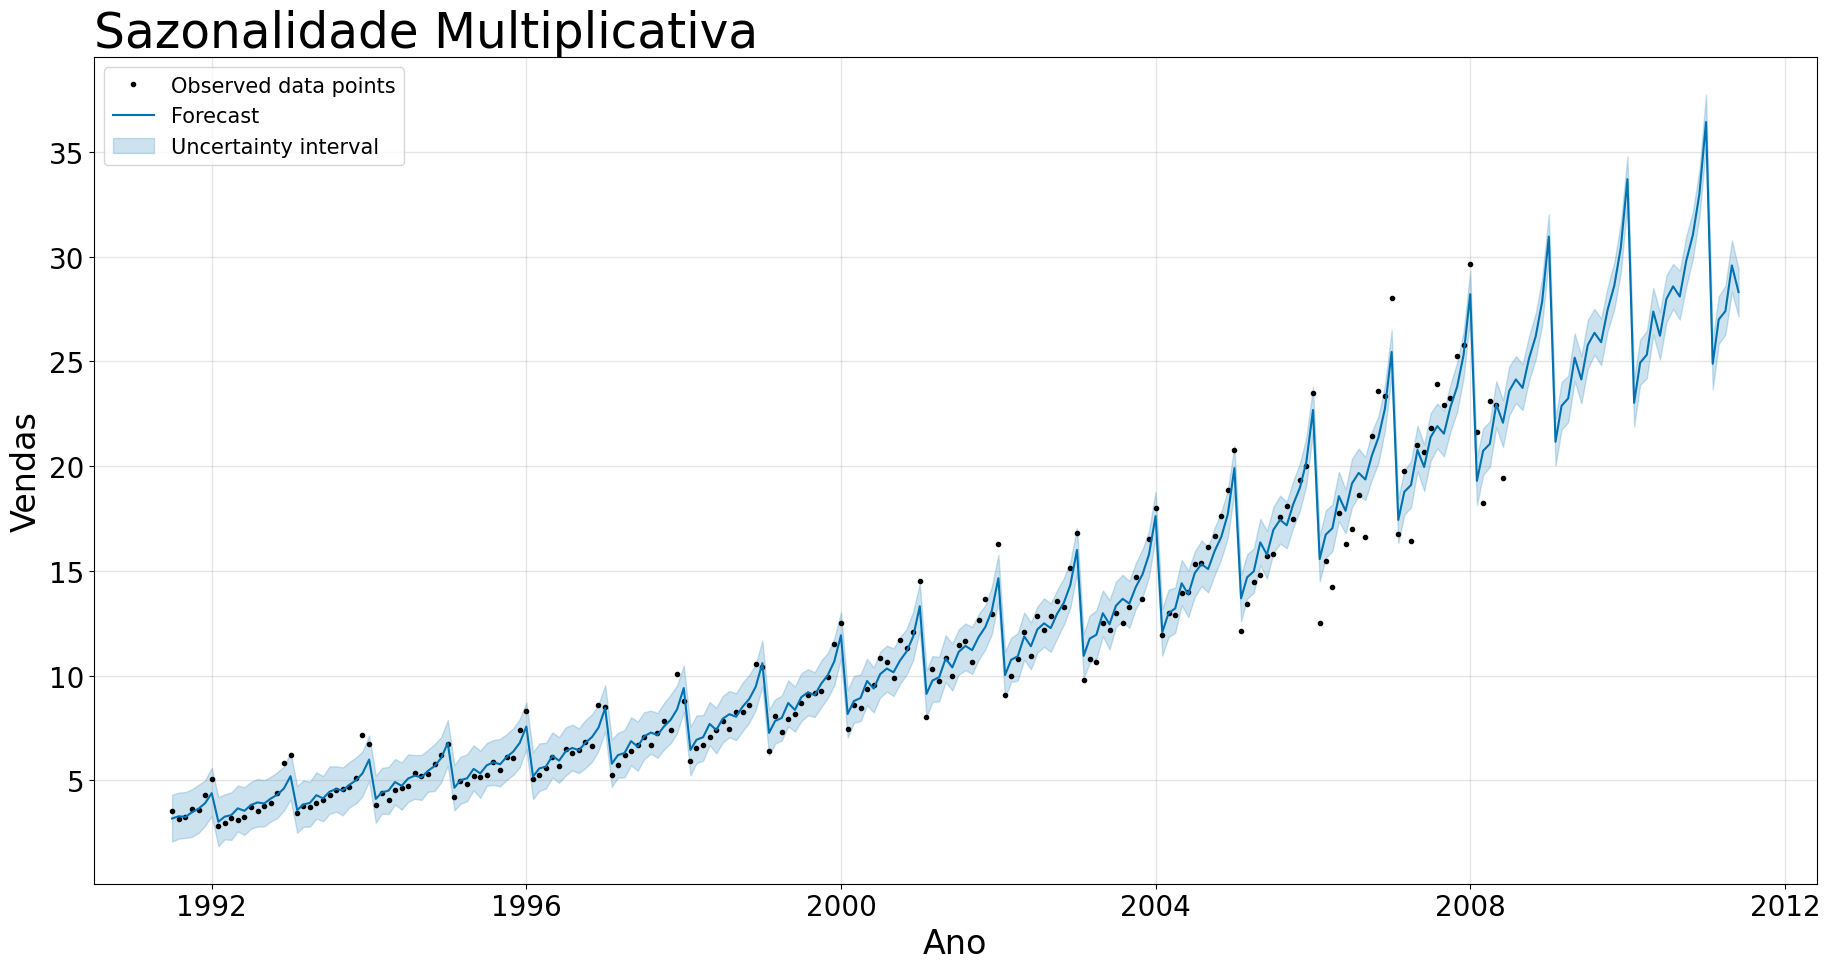

In [58]:
modelo.plot(previsao, figsize=(18,9));
plt.title('Sazonalidade Multiplicativa ', loc = 'left', fontsize = 35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Ano', fontsize=24)
plt.ylabel('Vendas', fontsize=24)
plt.legend(fontsize=15)
plt.show()

In [59]:
# Compute the mean squared error (MSE) between actual values (y_true) and predicted values (y_pred) for the first 204 observations
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'][:204]) 

0.7508270082164946

Portanto,  o  nosso  resultado  anterior  com  o  valor  de seasonality_prior_scale default é realmente melhor.

### SÉRIE  DE  FOURIER  PARA SAZONALIDADES

10:44:31 - cmdstanpy - INFO - Chain [1] start processing
10:44:31 - cmdstanpy - INFO - Chain [1] done processing


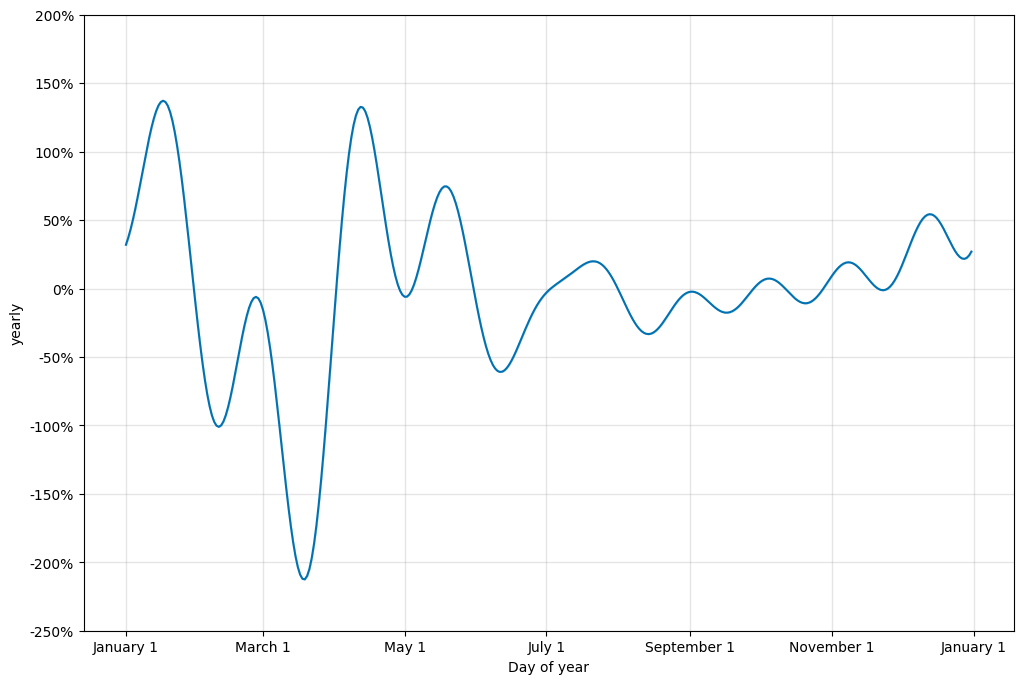

In [62]:
from prophet.plot import plot_yearly

modelo = Prophet(seasonality_mode='multiplicative').fit(df)

#Gráfico da sazonalidade anual
fig = plot_yearly(modelo,figsize=(12,8));

10:44:31 - cmdstanpy - INFO - Chain [1] start processing
10:44:31 - cmdstanpy - INFO - Chain [1] done processing


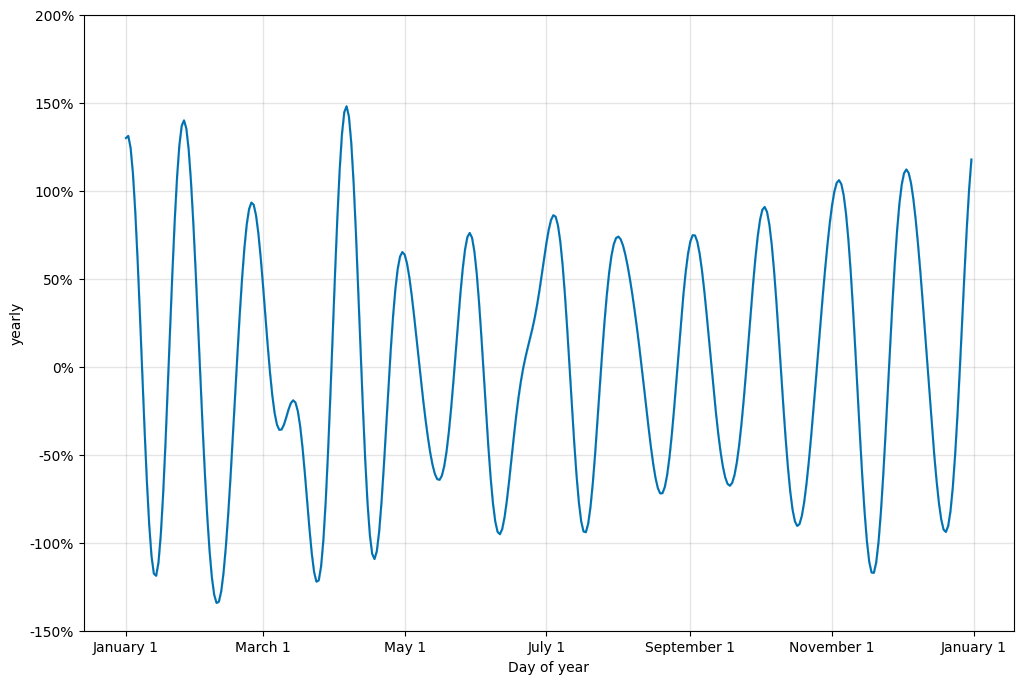

In [63]:
modelo = Prophet(yearly_seasonality=20, seasonality_mode='multiplicative').fit(df) # Default is 10

#Gráfico da sazonalidade anual
fig = plot_yearly(modelo,figsize=(12,8));

### ESPECIFICANDO SAZONALIDADES PERSONALIZADAS

Por  padrão,  o  Prophet  ajustará  as  sazonalidades  semanais  e
anuais,  se  a  série temporal tiver mais de dois  ciclos. Ele também
ajustará a sazonalidade diária para uma série temporal subdiária. É
possível  adicionar  manualmente  outras  sazonalidades  (mensal,
trimestral, horária) usando o método  add_seasonality 

# Bicicletas  Alugadas

In [67]:
dados_bikes = pd.read_csv('https://github.com/allanspadini/livro-val-allan/blob/main/london_merged.csv?raw=true')
dados_bikes.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0

In [68]:
df = pd.DataFrame()
df['ds'] = dados_bikes['timestamp'] 
df['y'] = dados_bikes['cnt']

In [69]:
modelo = Prophet()                                         # Instantiate the Prophet model
modelo.fit(df)                                             # Fit the model using the dataframe 'df'
dataFramefuturo = modelo.make_future_dataframe(periods=0)  # Create a future dataframe with 0 additional periods
previsao = modelo.predict(dataFramefuturo)                 # Generate predictions for the given dataframe 

10:44:35 - cmdstanpy - INFO - Chain [1] start processing
10:44:36 - cmdstanpy - INFO - Chain [1] done processing


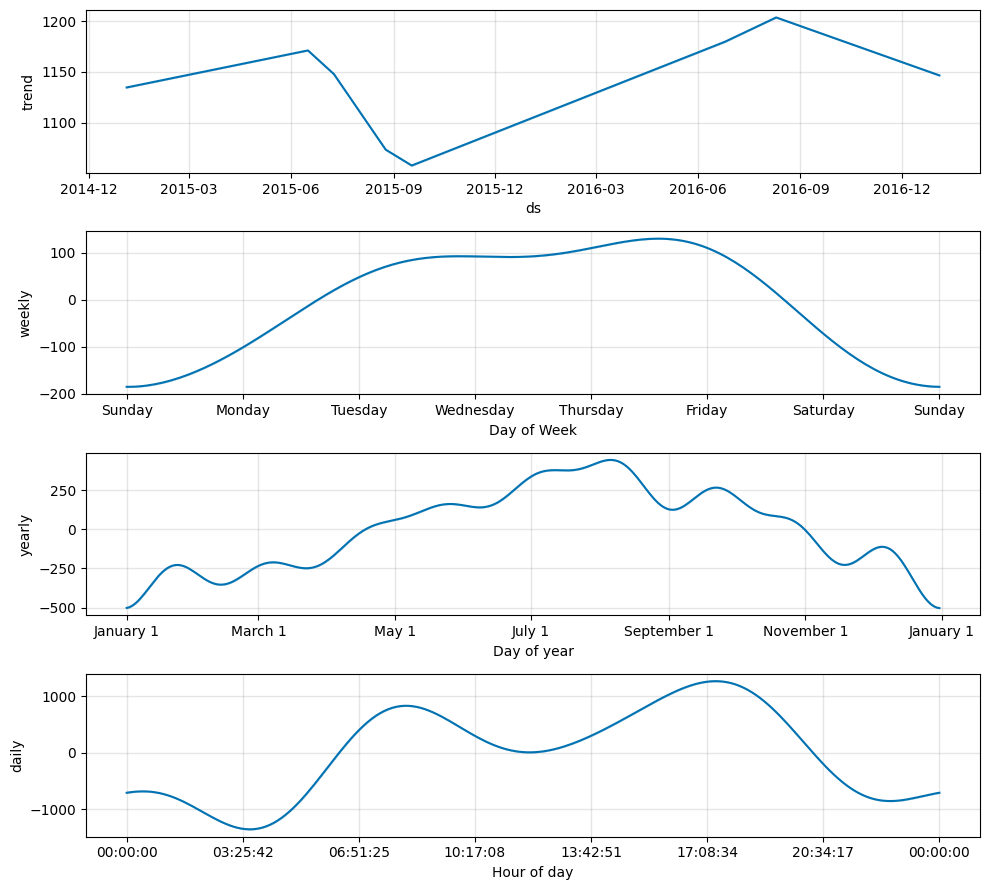

In [70]:
modelo.plot_components(previsao, figsize=(10,9));

In [71]:
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'])

481432.23916623753

In [72]:
modelo = Prophet(weekly_seasonality=False, daily_seasonality=False)   # Initialize Prophet model with no weekly or daily seasonality
modelo.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # Add custom monthly seasonality with a period of 30.5 days
modelo.fit(df)                                                        # Fit the model using the dataframe 'df'
dataFramefuturo = modelo.make_future_dataframe(periods=0)             # Create a future dataframe with 0 additional periods
previsao = modelo.predict(dataFramefuturo)                            # Generate predictions based on the trained model

10:44:44 - cmdstanpy - INFO - Chain [1] start processing
10:44:45 - cmdstanpy - INFO - Chain [1] done processing


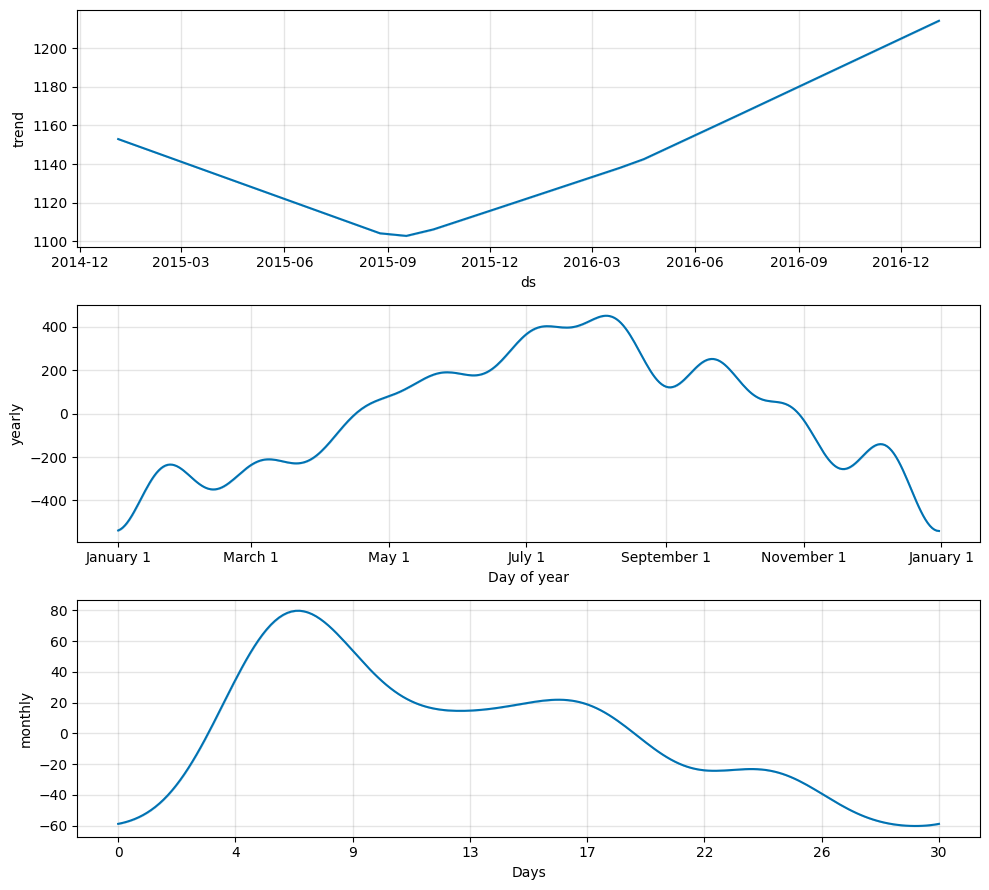

In [73]:
modelo.plot_components(previsao, figsize=(10,9));

Temos  apenas  a  sazonalidade  anual  e  mensal  agora! Observe
como  a  linha  de  tendência  mudou.  Como  estamos  trabalhando
com um dataset  que  contém  os horários de  contagens  por dia,  é
bem provável que usar apenas as sazonalidades anual e mensal não
seja a maneira mais adequada de realizar essa previsão. Isso pode
ser confirmado com a métrica do erro quadrático médio:

In [75]:
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'])

1104744.9003216622

In [76]:
modelo = Prophet(weekly_seasonality=False)                       # Initialize Prophet model without weekly seasonality
modelo.add_seasonality(name='daily', period=1, fourier_order=3)  # Add custom daily seasonality with a period of 1 day
modelo.fit(df)                                                   # Fit the model using the dataframe 'df'
dataFramefuturo = modelo.make_future_dataframe(periods=0)        # Create a future dataframe with 0 additional periods
previsao = modelo.predict(dataFramefuturo)                       # Generate predictions based on the trained model

10:44:52 - cmdstanpy - INFO - Chain [1] start processing
10:44:53 - cmdstanpy - INFO - Chain [1] done processing


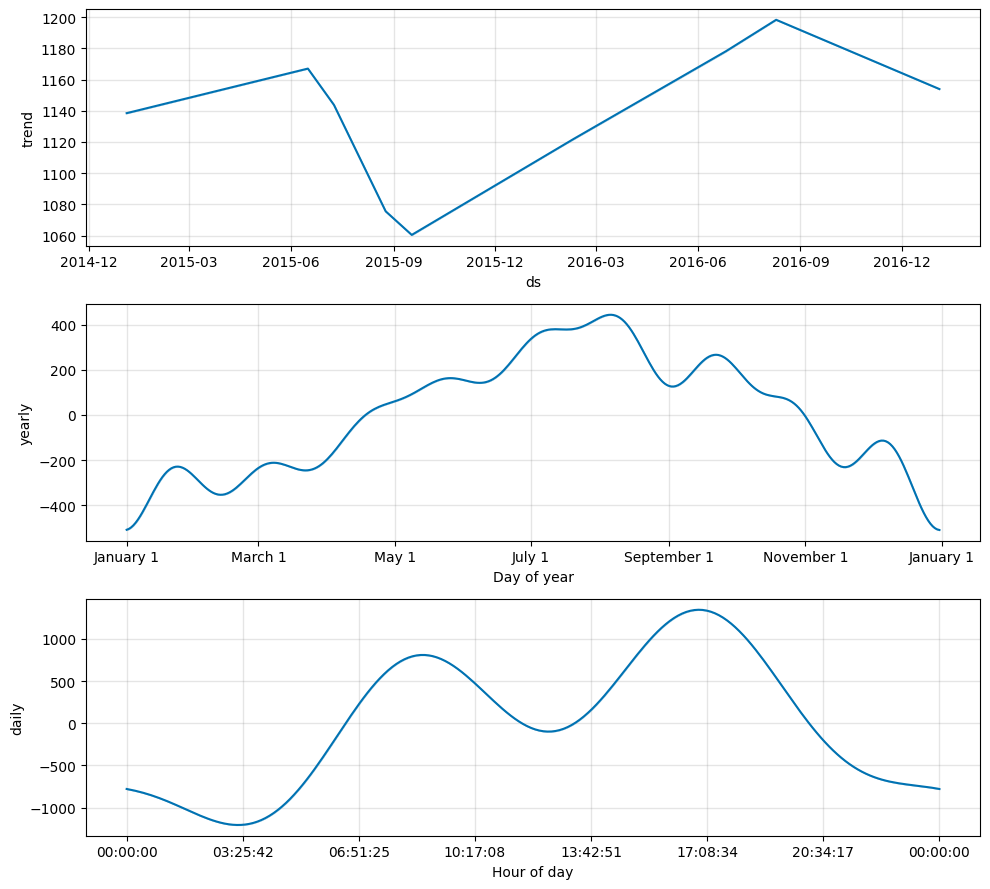

In [77]:
# Analisando o gráfico das componentes:
modelo.plot_components(previsao, figsize=(10,9));

In [78]:
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'])

509491.7983987734

Bom,  vamos  tentar  o  seguinte:  desabilitar  a  sazonalidade
semanal e adicionar a horária. Ao adicionar a sazonalidade horária,
precisamos  definir  o   period=1/24 ,  pois  estamos  considerando
um dia dividido por 24 horas:

In [80]:
# Create a Prophet model with custom seasonality
modelo = Prophet(weekly_seasonality=False)  # Disable default weekly seasonality

# Add hourly seasonality with a period of 1/24 (for hourly patterns)
modelo.add_seasonality(name='hourly', period=1/24, fourier_order=3)  

# Fit the model to the dataset
modelo.fit(df)  

# Create a dataframe for future predictions (no extra periods beyond original data)
dataFramefuturo = modelo.make_future_dataframe(periods=0)  

# Generate predictions using the trained model
previsao = modelo.predict(dataFramefuturo)  

10:45:02 - cmdstanpy - INFO - Chain [1] start processing
10:45:03 - cmdstanpy - INFO - Chain [1] done processing


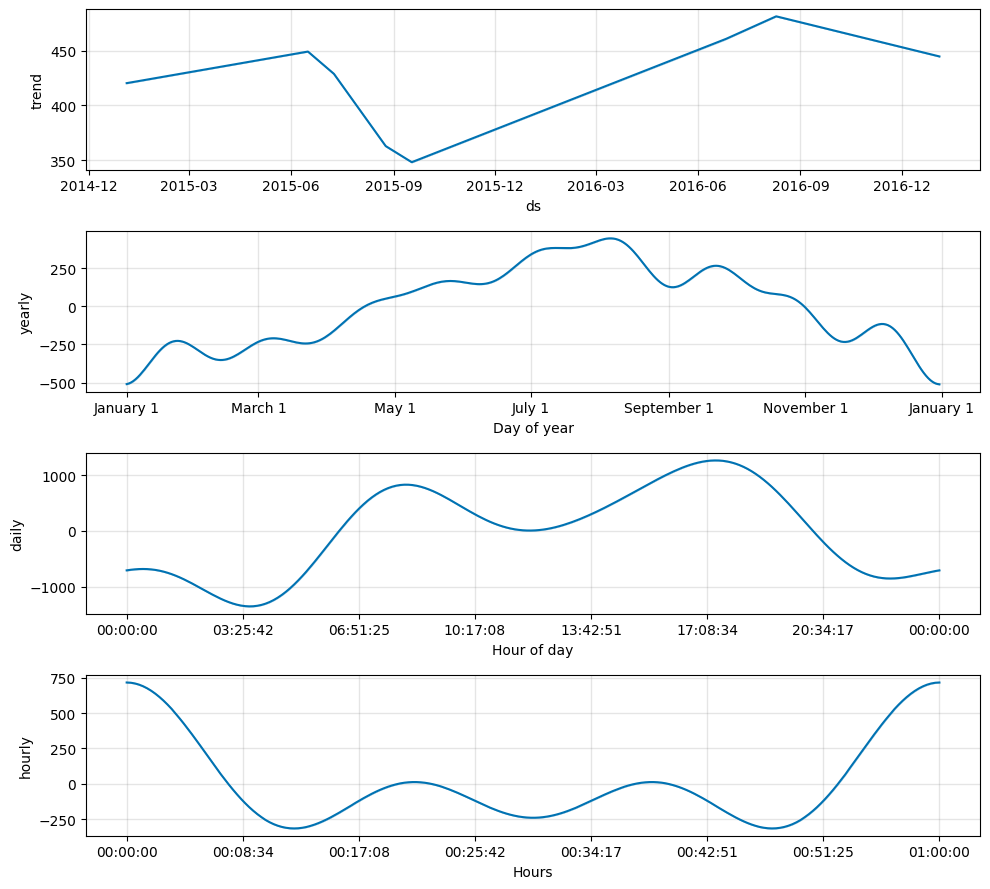

In [81]:
# Analisando o gráfico das componentes:
modelo.plot_components(previsao, figsize=(10,9));

Por  fim,  temos  as  sazonalidades  anual,  diária  e  horária. Podemos avaliar a métrica:

In [83]:
mean_squared_error(y_true = df['y'], y_pred=previsao['yhat'])

493672.9542303089